Básico

In [3]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [1]:
clima=['Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso', 'Chuvoso', 'Chuvoso', 'Nublado',
'Ensolarado', 'Ensolarado', 'Chuvoso', 'Ensolarado', 'Nublado', 'Nublado', 'Chuvoso']


temp=['Quente', 'Quente', 'Quente', 'Suave', 'Legal', 'Legal', 'Legal', 'Suave',
'Legal', 'Suave', 'Suave', 'Suave', 'Quente', 'Suave']

brincar=['Não','Não','Sim','Sim','Sim','Não','Sim','Não','Sim','Sim','Sim','Sim','Sim','Não']

In [4]:
#criando labelEncoder
le = preprocessing.LabelEncoder()


# Convertendo string labels para numeros.
clima_encoded = le.fit_transform(clima)
temp_encoded = le.fit_transform(temp)
print(clima_encoded)
print(temp_encoded)


# Convertendo string labels para numeros
alvo = le.fit_transform(brincar)
print(alvo)
# Combinando clima e temp em um unica lista de tuplas
carac=list(zip(clima_encoded,temp_encoded))
print(carac)

[1 1 2 0 0 0 2 1 1 0 1 2 2 0]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
[(1, 1), (1, 1), (2, 1), (0, 2), (0, 0), (0, 0), (2, 0), (1, 2), (1, 0), (0, 2), (1, 2), (2, 2), (2, 1), (0, 2)]


In [5]:
modelo = KNeighborsClassifier(n_neighbors=3)


# Treinando o modelo usando os ajustes de treinamento.
modelo.fit(carac,alvo)


# Previsão
predito = modelo.predict([[2,0]]) # 2:Nublado, 0:Legal
print(predito)

[1]


### KNN classificação

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()


from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


##### Carregando e tratando dados

In [8]:
cancer_mama = load_breast_cancer()
X = pd.DataFrame(cancer_mama.data, columns=cancer_mama.feature_names)
X = X[['mean area', 'mean compactness']]
X

y = pd.Categorical.from_codes(cancer_mama.target, cancer_mama.target_names)
y = pd.get_dummies(y, drop_first=True)
y


,benign
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


##### Criando e treinando modelo

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
print(y_pred)


[1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Axes: xlabel='mean area', ylabel='mean compactness'>

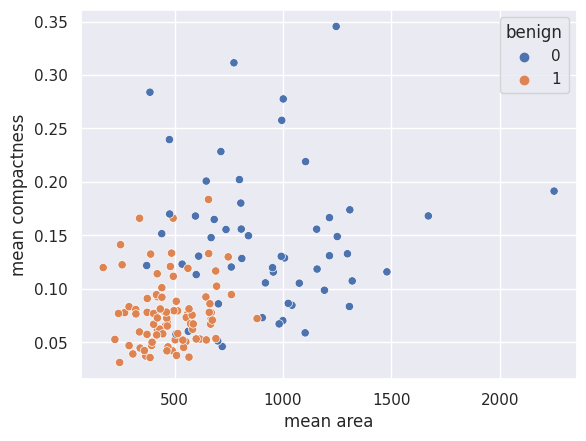

In [16]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)


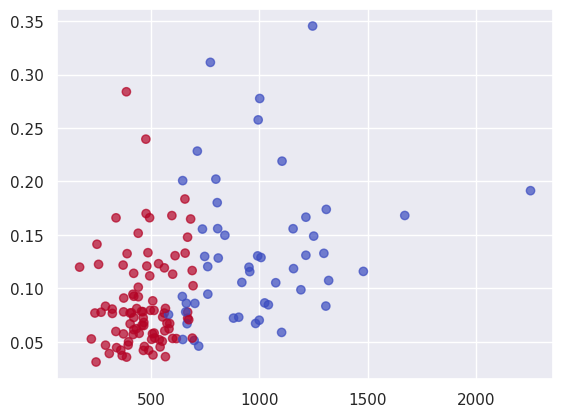

In [17]:
# Representação gráfica dos valores preditos (y_pred), utilizando o pacote plt
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [18]:
# Retorna a matriz de confusão mostrando os acertos e erros da nossa previsão
print(confusion_matrix(y_test, y_pred))

[[42 13]
 [ 9 79]]


##### Regressão KNN

In [19]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [27]:
# Lendo o arquivo USA_Housing.csv
df = pd.read_csv('sample_data/USA_Housing.csv')


# Exibindo as colunas
df.columns


# Excluir a coluna endereço
df.drop('Address',axis=1,inplace=True)


# Definimos X (variáveis preditoras) e y (variável target).
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']



<bound method NDFrame.describe of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0        

In [22]:
# Dividimos a base de dados em grupos de teste e de treinamento
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


# Modelo que representa o método KNN de Regressão, utilizando k = 3
model = KNeighborsRegressor(n_neighbors=3)

In [23]:
# Aplicamos os dados de treinamento ao modelo
model.fit(X_train,y_train)
# Aplicação do KNN Regressão ao grupo de teste e cálculo da precisão
precisao = model.score(X_test,y_test)
print(precisao)
# Cálculo da precisão com formatação 99% ao invés de 0.99
precisao = str(round(model.score(X_test,y_test) * 100, 2))+"%"
print(precisao)


0.47652506029922026
47.65%


In [24]:
# Utilizamos o método predict para retornar as previsões do nosso modelo
y_pred = model.predict(X_test)


# Utilizamos nossas previsões e os valores reais da variável target
# para calcular as métricas MAE e RMSE.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 208489.36741469573
RMSE: 260676.33329115086
